In [1]:
import csv
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
bitcoin_price_df = pd.read_csv("DynamoDBtoCSV/Coinbase_BTCUSD_1h_copy.csv")

In [4]:
bitcoin_price_df.describe()

,Open,High,Low,Close,Volume From,Volume To,Log Diff
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1.057000e+03,1056.000000
mean,5861.434655,5877.354721,5841.535979,5859.162999,453.831028,2.301626e+06,-0.000204
std,874.902471,860.539056,892.771402,877.179750,785.060847,3.699542e+06,0.012056
min,3604.310000,3675.780000,3457.810000,3604.310000,0.286300,1.838290e+03,-0.063769
25%,5525.500000,5535.570000,5490.610000,5521.900000,110.580000,6.924484e+05,-0.001593
50%,6348.170000,6353.330000,6341.660000,6348.170000,193.700000,1.183056e+06,-0.000004
75%,6405.000000,6409.990000,6401.000000,6405.000000,385.380000,2.157088e+06,0.001425
max,6657.080000,6810.000000,6517.020000,6657.080000,8602.750000,4.606758e+07,0.068642


In [5]:
bitcoin_price_df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Log Diff
0,2018-10-15 01-AM,BTCUSD,6192.94,6211.00,6192.94,6211.00,181.18,1123307.50,0.012799
1,2018-10-15 01-PM,BTCUSD,6405.77,6415.42,6360.00,6396.76,575.73,3679972.44,-0.013203
2,2018-10-15 02-AM,BTCUSD,6211.00,6211.00,6200.00,6205.22,125.47,778503.03,0.011724
3,2018-10-15 02-PM,BTCUSD,6396.76,6396.76,6362.68,6375.01,581.27,3709344.27,-0.010788
4,2018-10-15 03-AM,BTCUSD,6205.22,6218.61,6200.41,6218.61,115.59,717854.52,0.012172


In [6]:
for index in range (len(bitcoin_price_df.index)):
    time = bitcoin_price_df["Date"][index]
    print(time)
    timeList = time.split(" ")
    date = timeList[0]
    print(timeList)
    hourList = timeList[1].split("-")
    hour = hourList[0]
    dateSplit = date.split("-")
    day = dateSplit[2]
    if(hourList[1] == "PM"):
        if(hour == "12"):
            hour = "00"
            day = str(int(day) + 1)
        else:
            hour = int(hour) + 12
    if(len(day) == 1):
        day = "0" + day
    date = dateSplit[0] + "-" + dateSplit[1] + "-" + str(day)
    bitcoin_price_df['Date'][index] = date + "T:" + str(hour) + ":00:00Z"

2018-10-15 01-AM
['2018-10-15', '01-AM']
2018-10-15 01-PM
['2018-10-15', '01-PM']
2018-10-15 02-AM
['2018-10-15', '02-AM']
2018-10-15 02-PM
['2018-10-15', '02-PM']
2018-10-15 03-AM
['2018-10-15', '03-AM']
2018-10-15 03-PM
['2018-10-15', '03-PM']
2018-10-15 04-AM
['2018-10-15', '04-AM']
2018-10-15 04-PM
['2018-10-15', '04-PM']
2018-10-15 05-AM
['2018-10-15', '05-AM']
2018-10-15 05-PM
['2018-10-15', '05-PM']
2018-10-15 06-AM
['2018-10-15', '06-AM']
2018-10-15 06-PM
['2018-10-15', '06-PM']
2018-10-15 07-AM
['2018-10-15', '07-AM']
2018-10-15 07-PM
['2018-10-15', '07-PM']

/Users/eshuchatowitz/Documents/predictive_analytics/final/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2018-10-15 08-AM
['2018-10-15', '08-AM']
2018-10-15 08-PM
['2018-10-15', '08-PM']
2018-10-15 09-AM
['2018-10-15', '09-AM']
2018-10-15 09-PM
['2018-10-15', '09-PM']
2018-10-15 10-AM
['2018-10-15', '10-AM']
2018-10-15 10-PM
['2018-10-15', '10-PM']
2018-10-15 11-AM
['2018-10-15', '11-AM']
2018-10-15 11-PM
['2018-10-15', '11-PM']
2018-10-15 12-AM
['2018-10-15', '12-AM']
2018-10-15 12-PM
['2018-10-15', '12-PM']
2018-10-16 01-AM
['2018-10-16', '01-AM']
2018-10-16 01-PM
['2018-10-16', '01-PM']
2018-10-16 02-AM
['2018-10-16', '02-AM']
2018-10-16 02-PM
['2018-10-16', '02-PM']
2018-10-16 03-AM
['2018-10-16', '03-AM']
2018-10-16 03-PM
['2018-10-16', '03-PM']
2018-10-16 04-AM
['2018-10-16', '04-AM']
2018-10-16 04-PM
['2018-10-16', '04-PM']
2018-10-16 05-AM
['2018-10-16', '05-AM']
2018-10-16 05-PM
['2018-10-16', '05-PM']
2018-10-16 06-AM
['2018-10-16', '06-AM']
2018-10-16 06-PM
['2018-10-16', '06-PM']
2018-10-16 07-AM
['2018-10-16', '07-AM']
2018-10-16 07-PM
['2018-10-16', '07-PM']
2018-10-16 08-A

2018-10-23 12-PM
['2018-10-23', '12-PM']
2018-10-24 01-AM
['2018-10-24', '01-AM']
2018-10-24 01-PM
['2018-10-24', '01-PM']
2018-10-24 02-AM
['2018-10-24', '02-AM']
2018-10-24 02-PM
['2018-10-24', '02-PM']
2018-10-24 03-AM
['2018-10-24', '03-AM']
2018-10-24 03-PM
['2018-10-24', '03-PM']
2018-10-24 04-AM
['2018-10-24', '04-AM']
2018-10-24 04-PM
['2018-10-24', '04-PM']
2018-10-24 05-AM
['2018-10-24', '05-AM']
2018-10-24 05-PM
['2018-10-24', '05-PM']
2018-10-24 06-AM
['2018-10-24', '06-AM']
2018-10-24 06-PM
['2018-10-24', '06-PM']
2018-10-24 07-AM
['2018-10-24', '07-AM']
2018-10-24 07-PM
['2018-10-24', '07-PM']
2018-10-24 08-AM
['2018-10-24', '08-AM']
2018-10-24 08-PM
['2018-10-24', '08-PM']
2018-10-24 09-AM
['2018-10-24', '09-AM']
2018-10-24 09-PM
['2018-10-24', '09-PM']
2018-10-24 10-AM
['2018-10-24', '10-AM']
2018-10-24 10-PM
['2018-10-24', '10-PM']
2018-10-24 11-AM
['2018-10-24', '11-AM']
2018-10-24 11-PM
['2018-10-24', '11-PM']
2018-10-24 12-AM
['2018-10-24', '12-AM']
2018-10-24 12-PM

2018-11-01 07-AM
['2018-11-01', '07-AM']
2018-11-01 07-PM
['2018-11-01', '07-PM']
2018-11-01 08-AM
['2018-11-01', '08-AM']
2018-11-01 08-PM
['2018-11-01', '08-PM']
2018-11-01 09-AM
['2018-11-01', '09-AM']
2018-11-01 09-PM
['2018-11-01', '09-PM']
2018-11-01 10-AM
['2018-11-01', '10-AM']
2018-11-01 10-PM
['2018-11-01', '10-PM']
2018-11-01 11-AM
['2018-11-01', '11-AM']
2018-11-01 11-PM
['2018-11-01', '11-PM']
2018-11-01 12-AM
['2018-11-01', '12-AM']
2018-11-01 12-PM
['2018-11-01', '12-PM']
2018-11-02 01-AM
['2018-11-02', '01-AM']
2018-11-02 01-PM
['2018-11-02', '01-PM']
2018-11-02 02-AM
['2018-11-02', '02-AM']
2018-11-02 02-PM
['2018-11-02', '02-PM']
2018-11-02 03-AM
['2018-11-02', '03-AM']
2018-11-02 03-PM
['2018-11-02', '03-PM']
2018-11-02 04-AM
['2018-11-02', '04-AM']
2018-11-02 04-PM
['2018-11-02', '04-PM']
2018-11-02 05-AM
['2018-11-02', '05-AM']
2018-11-02 05-PM
['2018-11-02', '05-PM']
2018-11-02 06-AM
['2018-11-02', '06-AM']
2018-11-02 06-PM
['2018-11-02', '06-PM']
2018-11-02 07-AM

2018-11-09 12-PM
['2018-11-09', '12-PM']
2018-11-10 01-AM
['2018-11-10', '01-AM']
2018-11-10 01-PM
['2018-11-10', '01-PM']
2018-11-10 02-AM
['2018-11-10', '02-AM']
2018-11-10 02-PM
['2018-11-10', '02-PM']
2018-11-10 03-AM
['2018-11-10', '03-AM']
2018-11-10 03-PM
['2018-11-10', '03-PM']
2018-11-10 04-AM
['2018-11-10', '04-AM']
2018-11-10 04-PM
['2018-11-10', '04-PM']
2018-11-10 05-AM
['2018-11-10', '05-AM']
2018-11-10 05-PM
['2018-11-10', '05-PM']
2018-11-10 06-AM
['2018-11-10', '06-AM']
2018-11-10 06-PM
['2018-11-10', '06-PM']
2018-11-10 07-AM
['2018-11-10', '07-AM']
2018-11-10 07-PM
['2018-11-10', '07-PM']
2018-11-10 08-AM
['2018-11-10', '08-AM']
2018-11-10 08-PM
['2018-11-10', '08-PM']
2018-11-10 09-AM
['2018-11-10', '09-AM']
2018-11-10 09-PM
['2018-11-10', '09-PM']
2018-11-10 10-AM
['2018-11-10', '10-AM']
2018-11-10 10-PM
['2018-11-10', '10-PM']
2018-11-10 11-AM
['2018-11-10', '11-AM']
2018-11-10 11-PM
['2018-11-10', '11-PM']
2018-11-10 12-AM
['2018-11-10', '12-AM']
2018-11-10 12-PM

2018-11-18 07-PM
['2018-11-18', '07-PM']
2018-11-18 08-AM
['2018-11-18', '08-AM']
2018-11-18 08-PM
['2018-11-18', '08-PM']
2018-11-18 09-AM
['2018-11-18', '09-AM']
2018-11-18 09-PM
['2018-11-18', '09-PM']
2018-11-18 10-AM
['2018-11-18', '10-AM']
2018-11-18 10-PM
['2018-11-18', '10-PM']
2018-11-18 11-AM
['2018-11-18', '11-AM']
2018-11-18 11-PM
['2018-11-18', '11-PM']
2018-11-18 12-AM
['2018-11-18', '12-AM']
2018-11-18 12-PM
['2018-11-18', '12-PM']
2018-11-19 01-AM
['2018-11-19', '01-AM']
2018-11-19 01-PM
['2018-11-19', '01-PM']
2018-11-19 02-AM
['2018-11-19', '02-AM']
2018-11-19 02-PM
['2018-11-19', '02-PM']
2018-11-19 03-AM
['2018-11-19', '03-AM']
2018-11-19 03-PM
['2018-11-19', '03-PM']
2018-11-19 04-AM
['2018-11-19', '04-AM']
2018-11-19 04-PM
['2018-11-19', '04-PM']
2018-11-19 05-AM
['2018-11-19', '05-AM']
2018-11-19 05-PM
['2018-11-19', '05-PM']
2018-11-19 06-AM
['2018-11-19', '06-AM']
2018-11-19 06-PM
['2018-11-19', '06-PM']
2018-11-19 07-AM
['2018-11-19', '07-AM']
2018-11-19 07-PM

2018-11-26 12-AM
['2018-11-26', '12-AM']
2018-11-26 12-PM
['2018-11-26', '12-PM']
2018-11-27 01-AM
['2018-11-27', '01-AM']
2018-11-27 01-PM
['2018-11-27', '01-PM']
2018-11-27 02-AM
['2018-11-27', '02-AM']
2018-11-27 02-PM
['2018-11-27', '02-PM']
2018-11-27 03-AM
['2018-11-27', '03-AM']
2018-11-27 03-PM
['2018-11-27', '03-PM']
2018-11-27 04-AM
['2018-11-27', '04-AM']
2018-11-27 04-PM
['2018-11-27', '04-PM']
2018-11-27 05-AM
['2018-11-27', '05-AM']
2018-11-27 05-PM
['2018-11-27', '05-PM']
2018-11-27 06-AM
['2018-11-27', '06-AM']
2018-11-27 06-PM
['2018-11-27', '06-PM']
2018-11-27 07-AM
['2018-11-27', '07-AM']
2018-11-27 07-PM
['2018-11-27', '07-PM']
2018-11-27 08-AM
['2018-11-27', '08-AM']
2018-11-27 08-PM
['2018-11-27', '08-PM']
2018-11-27 09-AM
['2018-11-27', '09-AM']
2018-11-27 09-PM
['2018-11-27', '09-PM']
2018-11-27 10-AM
['2018-11-27', '10-AM']
2018-11-27 10-PM
['2018-11-27', '10-PM']
2018-11-27 11-AM
['2018-11-27', '11-AM']
2018-11-27 11-PM
['2018-11-27', '11-PM']
2018-11-27 12-AM

In [7]:
bitcoin_price_df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Log Diff
0,2018-10-15T:01:00:00Z,BTCUSD,6192.94,6211.00,6192.94,6211.00,181.18,1123307.50,0.012799
1,2018-10-15T:13:00:00Z,BTCUSD,6405.77,6415.42,6360.00,6396.76,575.73,3679972.44,-0.013203
2,2018-10-15T:02:00:00Z,BTCUSD,6211.00,6211.00,6200.00,6205.22,125.47,778503.03,0.011724
3,2018-10-15T:14:00:00Z,BTCUSD,6396.76,6396.76,6362.68,6375.01,581.27,3709344.27,-0.010788
4,2018-10-15T:03:00:00Z,BTCUSD,6205.22,6218.61,6200.41,6218.61,115.59,717854.52,0.012172


In [8]:
bitcoin_price_df.sort_values("Date")

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Log Diff
0,2018-10-15T:01:00:00Z,BTCUSD,6192.94,6211.00,6192.94,6211.00,181.18,1123307.50,0.012799
2,2018-10-15T:02:00:00Z,BTCUSD,6211.00,6211.00,6200.00,6205.22,125.47,778503.03,0.011724
4,2018-10-15T:03:00:00Z,BTCUSD,6205.22,6218.61,6200.41,6218.61,115.59,717854.52,0.012172
6,2018-10-15T:04:00:00Z,BTCUSD,6218.61,6218.61,6207.49,6212.47,181.28,1126432.70,0.014448
8,2018-10-15T:05:00:00Z,BTCUSD,6212.47,6407.00,6212.46,6363.90,2058.02,13006742.38,0.002747
10,2018-10-15T:06:00:00Z,BTCUSD,6363.90,6810.00,6363.89,6657.08,5909.11,38988145.42,-0.017443
12,2018-10-15T:07:00:00Z,BTCUSD,6657.08,6659.97,6414.00,6415.87,3279.46,21313467.87,-0.001755
14,2018-10-15T:08:00:00Z,BTCUSD,6415.87,6466.55,6381.94,6402.73,758.70,4872189.79,-0.000864
16,2018-10-15T:09:00:00Z,BTCUSD,6402.73,6430.00,6360.60,6423.79,331.14,2118001.64,-0.001949
18,2018-10-15T:10:00:00Z,BTCUSD,6423.79,6455.55,6402.00,6418.91,385.38,2477430.19,0.000784


In [9]:
for index in range (len(bitcoin_price_df.index)):
    time = bitcoin_price_df["Date"][index]
    if(time == "2018-10-32T:00:00:00Z"):
        bitcoin_price_df['Date'][index] = "2018-11-01T:00:00:00Z"

/Users/eshuchatowitz/Documents/predictive_analytics/final/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
bitcoin_price_df.sort_values("Date")

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To,Log Diff
0,2018-10-15T:01:00:00Z,BTCUSD,6192.94,6211.00,6192.94,6211.00,181.18,1123307.50,0.012799
2,2018-10-15T:02:00:00Z,BTCUSD,6211.00,6211.00,6200.00,6205.22,125.47,778503.03,0.011724
4,2018-10-15T:03:00:00Z,BTCUSD,6205.22,6218.61,6200.41,6218.61,115.59,717854.52,0.012172
6,2018-10-15T:04:00:00Z,BTCUSD,6218.61,6218.61,6207.49,6212.47,181.28,1126432.70,0.014448
8,2018-10-15T:05:00:00Z,BTCUSD,6212.47,6407.00,6212.46,6363.90,2058.02,13006742.38,0.002747
10,2018-10-15T:06:00:00Z,BTCUSD,6363.90,6810.00,6363.89,6657.08,5909.11,38988145.42,-0.017443
12,2018-10-15T:07:00:00Z,BTCUSD,6657.08,6659.97,6414.00,6415.87,3279.46,21313467.87,-0.001755
14,2018-10-15T:08:00:00Z,BTCUSD,6415.87,6466.55,6381.94,6402.73,758.70,4872189.79,-0.000864
16,2018-10-15T:09:00:00Z,BTCUSD,6402.73,6430.00,6360.60,6423.79,331.14,2118001.64,-0.001949
18,2018-10-15T:10:00:00Z,BTCUSD,6423.79,6455.55,6402.00,6418.91,385.38,2477430.19,0.000784


In [11]:
bitcoin_price_df.to_csv("revised_bitcoin_price.csv", ",")

In [2]:
def crosscorr(datax, datay, lag=0):
#     " Lag-N cross correlation."
#     Parameters
#     ----------
#     lag : int, default 0
#     datax, datay : pandas.Series objects of equal length

#     Returns
#     ----------
#     crosscorr : float
#     “”"
    return datax.corr(datay.shift(lag))

In [13]:
sentiment_orig_df = pd.read_csv("DynamoDBtoCSV/tweet_sentiment_by_hour_copy.csv")
sentiment_orig_df.to_csv("revised_sentiment.csv", ",")


In [14]:
sentiment_df = pd.read_csv("revised_sentiment.csv", ",")

In [15]:
sentiment_df.head()

,Unnamed: 0,sentiment,timestamp,numberOfTweets,Log Diff
0,0,1.482850,2018-10-15T05:00:00Z,1468,0.173916322
1,1,1.476849,2018-10-15T06:00:00Z,2191,0.018053722
2,2,1.401825,2018-10-15T07:00:00Z,2284,-0.035443999
3,3,1.354461,2018-10-15T08:00:00Z,2105,-0.020056043
4,4,1.460733,2018-10-15T09:00:00Z,2010,-0.002817993


In [16]:
bitcoin_df = pd.read_csv("revised_bitcoin_price.csv")

In [17]:
cross_cor_raw_0 = crosscorr(sentiment_df["sentiment"], bitcoin_df["Close"], 0)

In [18]:
print(cross_cor_raw_0)

0.21670145061721188


In [19]:
cross_cor_raw_1 = crosscorr(sentiment_df["sentiment"], bitcoin_df["Close"], -1)

In [20]:
print(cross_cor_raw_1)

0.21332039532830305


In [21]:
for x in range(300):
    print(crosscorr(sentiment_df["sentiment"], bitcoin_df["Close"], -1 * x))

0.21670145061721188
0.21332039532830305
0.21225683351094105
0.21368140411254669
0.21475879577927365
0.21311491399336172
0.21767166854987174
0.2142568842284345
0.2164960294367116
0.21771731129395863
0.2215896307719279
0.21661998371491073
0.21817029142167607
0.21252941589777616
0.22177953345925405
0.219675245333728
0.2183272439369398
0.21568587219034896
0.21717269679654486
0.21757809049181293
0.22297494344775914
0.21044351839400044
0.2183150149012076
0.21710009497628047
0.22230543132617106
0.2158610242161354
0.221458443703404
0.21717357512011923
0.22151893367373904
0.2179158175478737
0.22200167725382874
0.21577363196628105
0.22371256990252159
0.22075485849416665
0.22235783153244967
0.21949814252776195
0.22194849883197962
0.22092889895309825
0.22635920029687714
0.2235750122155343
0.23038339151271287
0.22577835414802014
0.2248041442499373
0.22530892892975823
0.22749123259981507
0.2226186893142262
0.22063792579031494
0.2209395108426932
0.22178055544712777
0.22093939458454626
0.2251910777775

In [22]:
for index in range (len(sentiment_df.index)):
    print(type(sentiment_df['Log Diff'][index]))
#     as_integer_s = float(sentiment_df["Log Diff"][index])
#     as_integer_b = float(bitcoin_df["Log Diff"][index])
#     sentiment_df['Log Diff'][index] = as_integer_s
#     bitcoin_df['Log Diff'][index] = as_integer_b

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [23]:
for x in range(300):
    print(crosscorr(sentiment_df["Log Diff"], bitcoin_df["Log Diff"], -1 * x))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
btc_to_sentiment_raw = np.zeros(500)
for x in range(500):
    btc_to_sentiment_raw[x] = crosscorr(sentiment_df["sentiment"], bitcoin_df["Close"], 1 * x)

In [ ]:
plt.plot(btc_to_sentiment_raw)


In [ ]:
sentiment_to_btc_raw = np.zeros(500)
for x in range(500):
    sentiment_to_btc_raw[x] = crosscorr(sentiment_df["sentiment"], bitcoin_df["Close"], -1 * x)

In [ ]:
plt.plot(sentiment_to_btc_raw)

In [ ]:
oct_sent = pd.read_csv("oct15thrunov11sentiment.csv")

In [ ]:
oct_btc = pd.read_csv("oct15thrunov11btc.csv")

In [ ]:
oct_sentiment_to_btc_raw = np.zeros(500)
for x in range(500):
    oct_sentiment_to_btc_raw[x] = crosscorr(oct_sent["sentiment"], oct_btc["Close"], -1 * x)

In [ ]:
plt.plot(oct_sentiment_to_btc_raw)

In [ ]:
nov_sent = pd.read_csv("nov11thru27sentiment.csv")

In [ ]:
nov_btc = pd.read_csv("nov11thru27btc.csv")

In [ ]:
nov_sentiment_to_btc_raw = np.zeros(500)
for x in range(500):
    nov_sentiment_to_btc_raw[x] = crosscorr(nov_sent["sentiment"], nov_btc["Close"], -1 * x)

In [ ]:
plt.plot(nov_sentiment_to_btc_raw)

In [ ]:
nov_btc_to_sent_raw = np.zeros(500)
for x in range(500):
    nov_btc_to_sent_raw[x] = crosscorr(nov_sent["sentiment"], nov_btc["Close"], 1 * x)

In [ ]:
plt.plot(nov_btc_to_sent_raw)

In [27]:
pivot_btc = pd.read_csv("pivotBTC13to15.csv")

In [28]:
pivot_sent = pd.read_csv("pivotSent13to15.csv")

In [29]:
pivot_sent_to_btc = np.zeros(500)
for x in range(500):
    pivot_sent_to_btc[x] = crosscorr(pivot_sent["Log Diff"], pivot_btc["Close"], -1 * x)

/Users/eshuchatowitz/Documents/predictive_analytics/final/env/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/eshuchatowitz/Documents/predictive_analytics/final/env/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


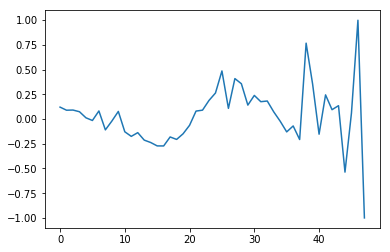

In [30]:
plt.plot(pivot_sent_to_btc)

In [ ]:
log_dff_sent_to_btc = np.zeros(500)
for x in range(500):
    log_dff_sent_to_btc[x] = crosscorr(sentiment_df["Log Diff"], bitcoin_df["Close"], -1 * x)

In [ ]:
plt.plot(log_dff_sent_to_btc)

In [3]:
os.chdir("/Users/eshuchatowitz/Documents/predictive_analytics/final/twitter-analysis/src/main/resources/csvs")
for file in glob.glob("*.csv"):
    file_df = pd.read_csv(file)
    maxIter = 0
    maxCorr = 0
    sent_to_btc = np.zeros(30)
    for x in range(30):
        corr = crosscorr(file_df["Sentiment"], file_df["Close"], -1 * x)
        sent_to_btc[x] = corr
        if(corr > maxCorr):
            maxCorr = corr
            maxIter = x
    print(str(file) + "," + str(maxCorr) + "," + str(maxIter))

2018-10-24T00:00:00Z.csv,0.412173473344798,27
2018-10-24T01:00:00Z.csv,0.473658584520039,5
2018-10-24T02:00:00Z.csv,0.5209924369597224,5
2018-10-24T03:00:00Z.csv,0.5177334491456768,5
2018-10-24T04:00:00Z.csv,0.5254434563899038,5
2018-10-24T05:00:00Z.csv,0.5524807801556518,27
2018-10-24T06:00:00Z.csv,0.6126399280149503,27
2018-10-24T07:00:00Z.csv,0.6403643589078553,28
2018-10-24T08:00:00Z.csv,0.7254897432748055,29
2018-10-24T09:00:00Z.csv,0.6005566207853503,28
2018-10-24T10:00:00Z.csv,0.6076689888904121,28
2018-10-24T11:00:00Z.csv,0.6380340801814776,28
2018-10-24T12:00:00Z.csv,0.6719841706368926,28
2018-10-24T13:00:00Z.csv,0.6798348088305246,27
2018-10-24T14:00:00Z.csv,0.6970238232515708,27
2018-10-24T15:00:00Z.csv,0.7118540616901101,27
2018-10-24T16:00:00Z.csv,0.6421540507404566,27
2018-10-24T17:00:00Z.csv,0.6785589357441579,28
2018-10-24T18:00:00Z.csv,0.6808847251113229,28
2018-10-24T19:00:00Z.csv,0.6742855020877518,28
2018-10-24T20:00:00Z.csv,0.6772782701546538,28
2018-10-24T21:00:00

2018-10-31T17:00:00Z.csv,0.571623506018259,12
2018-10-31T18:00:00Z.csv,0.5984733584812797,12
2018-10-31T19:00:00Z.csv,0.6206056451412157,12
2018-10-31T20:00:00Z.csv,0.645872819496246,12
2018-10-31T21:00:00Z.csv,0.699174528608208,27
2018-10-31T22:00:00Z.csv,0.6435057555028236,28
2018-10-31T23:00:00Z.csv,0.6395749897228681,27
2018-11-01T00:00:00Z.csv,0.6250678233086037,28
2018-11-01T01:00:00Z.csv,0.5310975668662691,28
2018-11-01T02:00:00Z.csv,0.5247475078080822,29
2018-11-01T03:00:00Z.csv,0.3315394990362942,18
2018-11-01T04:00:00Z.csv,0.36434852577604915,18
2018-11-01T05:00:00Z.csv,0.30292100543969114,22
2018-11-01T06:00:00Z.csv,0.30131453299563465,20
2018-11-01T07:00:00Z.csv,0.2733877251039111,22
2018-11-01T08:00:00Z.csv,0.31262714957153226,27
2018-11-01T09:00:00Z.csv,0.38432974730349795,28
2018-11-01T10:00:00Z.csv,0.3203477596308699,28
2018-11-01T11:00:00Z.csv,0.26074514708528024,28
2018-11-01T12:00:00Z.csv,0.22440417733413615,28
2018-11-01T13:00:00Z.csv,0.322560983820003,28
2018-11-01

2018-11-08T05:00:00Z.csv,0.5164450880438674,24
2018-11-08T06:00:00Z.csv,0.5319354842746238,24
2018-11-08T07:00:00Z.csv,0.4506139011685055,24
2018-11-08T08:00:00Z.csv,0.49754304869859084,24
2018-11-08T09:00:00Z.csv,0.5179978210874865,24
2018-11-08T10:00:00Z.csv,0.4411920086395959,24
2018-11-08T11:00:00Z.csv,0.41085061818254837,12
2018-11-08T12:00:00Z.csv,0.4332483192078497,12
2018-11-08T13:00:00Z.csv,0.2815431007210114,12
2018-11-08T14:00:00Z.csv,0.3823324624879808,24
2018-11-08T15:00:00Z.csv,0.3748963368904619,12
2018-11-08T16:00:00Z.csv,0.3847269182467692,12
2018-11-08T17:00:00Z.csv,0.3842378218194205,12
2018-11-08T18:00:00Z.csv,0.3812582415388775,12
2018-11-08T19:00:00Z.csv,0.39220873747190504,24
2018-11-08T20:00:00Z.csv,0.359527402452234,24
2018-11-08T21:00:00Z.csv,0.29527508204911923,12
2018-11-08T22:00:00Z.csv,0.42933375713985295,24
2018-11-08T23:00:00Z.csv,0.5723608299698828,24
2018-11-09T00:00:00Z.csv,0.6630020421851901,24
2018-11-09T01:00:00Z.csv,0.23292953273022582,22
2018-11-

2018-11-15T19:00:00Z.csv,0.4871261196223714,27
2018-11-15T20:00:00Z.csv,0.4381719956225368,27
2018-11-15T21:00:00Z.csv,0.36400115854267995,24
2018-11-15T22:00:00Z.csv,0.33713604564273364,24
2018-11-15T23:00:00Z.csv,0.6813006649647867,26
2018-11-16T00:00:00Z.csv,0.4417286944557348,22
2018-11-16T01:00:00Z.csv,0.456078532509755,22
2018-11-16T02:00:00Z.csv,0.5624741973530551,23
2018-11-16T03:00:00Z.csv,0.6228379163358494,23
2018-11-16T04:00:00Z.csv,0.5376618449695005,23
2018-11-16T05:00:00Z.csv,0.4283490273374962,27
2018-11-16T06:00:00Z.csv,0.4350122722520165,27
2018-11-16T07:00:00Z.csv,0.486726647701272,27
2018-11-16T08:00:00Z.csv,0.4292651618986234,23
2018-11-16T09:00:00Z.csv,0.44279464600802493,23
2018-11-16T10:00:00Z.csv,0.47338269670464,23
2018-11-16T11:00:00Z.csv,0.4424397053931899,23
2018-11-16T12:00:00Z.csv,0.5447583519081437,27
2018-11-16T13:00:00Z.csv,0.5801441000201153,27
2018-11-16T14:00:00Z.csv,0.4080038384678214,27
2018-11-16T15:00:00Z.csv,0.239956381378599,10
2018-11-16T16:0

2018-11-23T12:00:00Z.csv,0.4964167538200819,24
2018-11-23T13:00:00Z.csv,0.4229184242441253,24
2018-11-23T14:00:00Z.csv,0.5321421210483476,24
2018-11-23T15:00:00Z.csv,0.5592544026762781,24
2018-11-23T16:00:00Z.csv,0.5694104237011492,24
2018-11-23T17:00:00Z.csv,0.4989222611011499,24
2018-11-23T18:00:00Z.csv,0.5731924755141179,24
2018-11-23T19:00:00Z.csv,0.5191415479879891,27
2018-11-23T20:00:00Z.csv,0.4738754138811236,24
2018-11-23T21:00:00Z.csv,0.5774263523140614,24
2018-11-23T22:00:00Z.csv,0.6073624363538114,24
2018-11-23T23:00:00Z.csv,0.35935446454737635,26
2018-11-24T00:00:00Z.csv,0.41782406063712046,26
2018-11-24T01:00:00Z.csv,0.43499129639848527,27
2018-11-24T02:00:00Z.csv,0.3964340752682698,27
2018-11-24T03:00:00Z.csv,0.5084528173512378,27
2018-11-24T04:00:00Z.csv,0.4988308775119075,27
2018-11-24T05:00:00Z.csv,0.39983825826256514,27
2018-11-24T06:00:00Z.csv,0.3495770314292824,27
2018-11-24T07:00:00Z.csv,0.39498017589038625,27
2018-11-24T08:00:00Z.csv,0.25953763411290154,27
2018-11

In [17]:
file_df = pd.read_csv("DynamoDBToCSV/tweets_and_btc_by_hour.csv")

In [18]:
log_dff_sent_to_btc = np.zeros(500)
for x in range(500):
    log_dff_sent_to_btc[x] = crosscorr(file_df["LogDiffSent"], file_df["LogDiffBTC"], -1 * x)
    
plt.plot(log_dff_sent_to_btc)

TypeError: unsupported operand type(s) for /: 'str' and 'int'